# Generating statistics for subset of Wikidata

This notebook illustrates how to generate statistics for a subset of Wikidata. \
We use as an example https://www.wikidata.org/wiki/Q11173 (chemical compound).

Example Dataset wikidata subset: https://drive.google.com/drive/u/1/folders/1KjNwV5M2G3JzCrPgqk_TSx8wTE49O2Sx \
Example Dataset statistics: https://drive.google.com/drive/u/1/folders/1_4Mxd0MAo0l9aR3aInv0YMTJrtneh7HW 

### Example Invocation command

    papermill /Users/shashanksaurabh/Desktop/MS/ISI/isi/Profiler/Example_9-Wikidata_Subset_Statistics_.ipynb \
    /Users/shashanksaurabh/Desktop/MS/ISI/isi/Profiler/Profiler.v2.output.ipynb \
    -p wikidata_home '/Users/shashanksaurabh/Desktop/Data_isi' \
    -p wikidata_parts_folder '/Users/shashanksaurabh/Desktop/Data_isi/Chemical' \
    -p cache_folder '/Users/shashanksaurabh/Desktop/Data_isi/Temp' \
    -p output_folder '/Users/shashanksaurabh/Desktop/Data_isi/output' \
    -p delete_database 'yes' \
    -p K \"10\" \
    -p subset_name 'Q11173'


In [59]:
wikidata_home = "/Users/shashanksaurabh/Desktop/Data_isi"
# path to folder which contains all files corresponding to the wikidata subset. 
#(For more information on wikidata subset please check Example 8)
wikidata_parts_folder = "/Users/shashanksaurabh/Desktop/Data_isi/Chemical"
# The notebook creates a cache, which stores in the cache_folder. The cache can be deleted after the execution.
cache_folder = "/Users/shashanksaurabh/Desktop/Data_isi/Temp"
# path to the folder where the output (here statistics) would be stored
output_folder = "/Users/shashanksaurabh/Desktop/Data_isi/output"
# delete_database = "yes"
# The statistics also uses the consolidated kgtk file with all the properties and items. This is the path to consolidated file
# In each of statistics top K results are chosen. In the following examples this has been implemented using the --limit attribute.
K = "10"
subset_name = "Q11173"

In [57]:
import io
import os
import subprocess
import sys

import numpy as np
import pandas as pd

import altair as alt

# from IPython.display import display, HTML, Image
# from pandas_profiling import ProfileReport

### Set up environment variables and folders that we need

In [58]:
# path to folder which contains all files corresponding to the wikidata subset. 
#(For more information on wikidata subset please check Example 8)
os.environ['WIKIDATA_PARTS'] = wikidata_parts_folder
# path to the folder where the output (here statistics) would be stored
os.environ['OUTPUT_FOLDER'] = output_folder
# kgtk command to run
os.environ['kgtk'] = "kgtk"
os.environ['kgtk'] = "time kgtk --debug"
# absolute path of the db
os.environ['STORE'] = "{}/wikidata.sqlite3.db".format(cache_folder)
os.environ['K'] = K
os.environ['label'] = subset_name + ".label.en.tsv.gz"
# file name corresponding to different part of the subsets.
os.environ['subset_name']  = subset_name
os.environ['external_id']  = subset_name + ".part.external-id.tsv.gz"
os.environ['time']  = subset_name +  ".part.time.tsv.gz "
os.environ['wikibase_item']  = subset_name + ".part.wikibase-item.tsv.gz"
os.environ['quantity']  = subset_name +  ".part.quantity.tsv.gz"
os.environ['statistics']  = subset_name + ".statistics.tsv.gz"
os.environ['wikibase_form']  = subset_name + ".part.wikibase-form.tsv.gz"
os.environ['monolingualtext']  = subset_name + ".part.monolingualtext.tsv.gz"
os.environ['math']  = subset_name + ".part.math.tsv.gz"
os.environ['commonsMedia']  = subset_name + ".part.commonsMedia.tsv.gz"
os.environ['globe_coordinate']  = subset_name + ".part.globe-coordinate.tsv.gz"
os.environ['musical_notation']  = subset_name + ".part.musical-notation.tsv.gz"
os.environ['geo_shape']  = subset_name + ".part.geo-shape.tsv.gz"
os.environ['url']  = subset_name + ".part.url.tsv.gz"
os.environ['string']  = subset_name + ".part.string.tsv.gz"
# Output file for statistics 1.1
os.environ['class_summary']  = subset_name + ".1.class_summary.tsv"
# Output files for statistics 2.1
os.environ['property_summary']  = subset_name + ".2.1.property_summary.tsv"
# Output files for statistics 2.2
os.environ['property_summary_external_id']  = subset_name + ".2.2.1property_summary_external_id.tsv"
os.environ['property_summary_time']  = subset_name + ".2.2.2property_summary_time.tsv"
os.environ['property_summary_wikibase_item']  = subset_name + ".2.2.3property_summary_wikibase_item.tsv"
os.environ['property_summary_quantity']  = subset_name + ".2.2.4.property_summary_quantity.tsv"
os.environ['property_summary_wikibase_form']  = subset_name + ".2.2.5.property_summary_wikibase_form.tsv"
os.environ['property_summary_monolingualtext']  = subset_name + ".2.2.6.property_summary_monolingualtext.tsv"
os.environ['property_summary_math']  = subset_name + ".2.2.7property_summary_math.tsv"
os.environ['property_summary_commonsMedia']  = subset_name + ".2.2.8.property_summary_commonsMedia.tsv"
os.environ['property_summary_globe_coordinate']  = subset_name + ".2.2.9.property_summary_globe_coordinate.tsv"
os.environ['property_summary_musical_notation']  = subset_name + ".2.2.10.property_summary_musical_notation.tsv"
os.environ['property_summary_geo_shape']  = subset_name + ".2.2.11.property_summary_geo_shape.tsv"
os.environ['property_summary_url']  = subset_name + ".2.2.12.property_summary_url.tsv"
os.environ['property_summary_string']  = subset_name + ".2.2.13.property_summary_string.tsv"
# Output files for statistics 2.3
os.environ['item_properties']  = subset_name + ".2.3.item_properties.tsv"# Output files for statistics 3.1
# Output files for statistics 2.4
os.environ['time_properties']  = subset_name + ".2.4.1.time_properties.tsv"
os.environ['time_properties_count']  = subset_name + ".2.4.2.time_properties.tsv"
# Output files for statistics 2.5
os.environ['quantity_properties']  = subset_name + ".2.5.quantity_properties.tsv"
# Output files for statistics 2.6
os.environ['distinct_values_math']  = subset_name + ".2.6.1.distinct_values_math.tsv"
os.environ['distinct_values_string']  = subset_name + ".2.6.2.distinct_values_string.tsv"
os.environ['distinct_values_external_id']  = subset_name + ".2.6.3.distinct_values_external_id.tsv"
os.environ['distinct_values_monolingual_text']  = subset_name + ".2.6.4.distinct_values_monolingual_text.tsv"
os.environ['distinct_values_musical_notation']  = subset_name + ".2.6.5.distinct_values_musical_notation.tsv"
# Output files for statistics 2.7
os.environ['globe_coordinate_top_m']  = subset_name + ".2.7.globe_coordinate_top_m.tsv"
# Output files for statistics 2.8
os.environ['geo_shape_top_m']  = subset_name + ".2.8.geo_shape_top_m.tsv"

In [23]:
def run_command(cmd, substitution_dictionary = {}):
    """Run a templetized command."""
    for k, v in substitution_dictionary.items():
        cmd = cmd.replace(k, v)
    
    print(cmd)
    output = subprocess.run([cmd], shell=True, universal_newlines=True, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    print(output.stdout)
    print(output.stderr)
    #print(output.returncode)

# 1. Classes
   ## 1.1 Class summary
   ### List of top K classes based on number of instances (Done)
   ### class -- is the qnode corresponding to the class 
   ### pnode -- is the property by which the class is linked
   ### name -- is the label for the class
   ### number of instances -- is the number of instances of the class in wikidata subset
   ### pagerank -- is the page rank of class
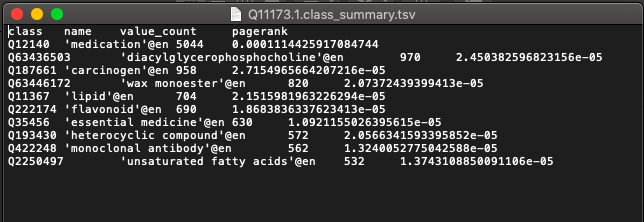

In [47]:
cmd = "$kgtk query -i $WIKIDATA_PARTS/$wikibase_item -i $WIKIDATA_PARTS/$label -i $WIKIDATA_PARTS/$statistics --graph-cache $STORE \
-o $OUTPUT_FOLDER/$class_summary \
--match 'item: (n1)-[l{label:llab}]->(n2), label: (n2)-[:label]->(label),statistics:(n2)-[:vertex_pagerank]->(pagerank) ' \
--return 'distinct n2 as class, label as name, count(n2) as value_count, pagerank as pagerank' \
--where '(label.kgtk_lqstring_lang_suffix = \"en\") AND (llab IN [\"P31\" , \"P279\"]) AND (n2 != \"__subset_name\") ' \
--order-by 'count(n2) desc' \
--limit $K "

run_command(cmd, {"__subset_name": subset_name})

$kgtk query -i $WIKIDATA_PARTS/$wikibase_item -i $WIKIDATA_PARTS/$label -i $WIKIDATA_PARTS/$statistics --graph-cache $STORE --match 'item: (n1)-[l{label:llab}]->(n2), label: (n2)-[:label]->(label),statistics:(n2)-[:vertex_pagerank]->(pagerank) ' --return 'distinct n2 as class, label as name, count(n2) as value_count, pagerank as pagerank' --where '(label.kgtk_lqstring_lang_suffix = "en") AND (llab IN ["P31" , "P279"]) AND (n2 != "Q11173") ' --order-by 'count(n2) desc' --limit $K 
class	name	value_count	pagerank
Q12140	'medication'@en	5044	0.0001114425917084744
Q63436503	'diacylglycerophosphocholine'@en	970	2.450382596823156e-05
Q187661	'carcinogen'@en	958	2.7154965664207216e-05
Q63446172	'wax monoester'@en	820	2.07372439399413e-05
Q11367	'lipid'@en	704	2.1515981963226294e-05
Q222174	'flavonoid'@en	690	1.8683836337623413e-05
Q35456	'essential medicine'@en	630	1.0921155026395615e-05
Q193430	'heterocyclic compound'@en	572	2.0566341593395852e-05
Q422248	'monoclonal antibody'@en	562	1.32400

 ### Example wikibase item for each of the class.
 ### qnode -- is the qnode of the example wikibase item
 ### name -- is the label of qnode
 ### pagerank -- is the page rank of the qnode
 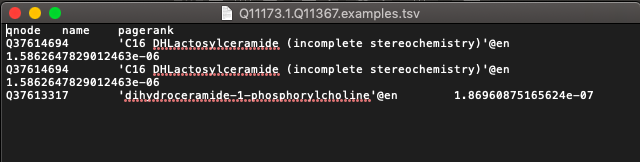

In [48]:
try:
    df = pd.read_csv(os.path.join(os.getenv('OUTPUT_FOLDER'),os.getenv('class_summary')),delimiter='\t')
    cmd = "$kgtk query -i $WIKIDATA_PARTS/$wikibase_item  -i $WIKIDATA_PARTS/$label -i $WIKIDATA_PARTS/$statistics --graph-cache $STORE \
    -o $OUTPUT_FOLDER/__output_file \
    --match 'item: (n1)-[l]->(n2:__class), label: (n1)-[:label]->(label), statistics:(n1)-[:vertex_pagerank]->(pagerank)' \
    --return 'n1 as qnode, label as name, pagerank as pagerank' \
    --where 'label.kgtk_lqstring_lang_suffix = \"en\"' \
    --order-by pagerank \
    --limit 3"
    for index, ele in df.iterrows():
        if ele["class"] ==  subset_name:
            continue
        print("Examples for ", ele["class"]," class")
        output_file = subset_name + ".1." + ele["class"]+".examples"+".tsv"
        run_command(cmd, {"__output_file": output_file,"__class": ele["class"]})
except Exception as e:
    print(e)

Examples for  Q12140  class
$kgtk query -i $WIKIDATA_PARTS/$wikibase_item  -i $WIKIDATA_PARTS/$label -i $WIKIDATA_PARTS/$statistics --graph-cache $STORE     --match 'item: (n1)-[l]->(n2:Q12140), label: (n1)-[:label]->(label), statistics:(n1)-[:vertex_pagerank]->(pagerank)'     --return 'n1 as qnode, label as name, pagerank as pagerank'     --where 'label.kgtk_lqstring_lang_suffix = "en"'     --order-by pagerank     --limit 3
qnode	name	pagerank
Q21011228	'dulaglutide'@en	1.0010828324322714e-06
Q21011228	'dulaglutide'@en	1.0010828324322714e-06
Q27270940	'tezacaftor'@en	1.0040699541178656e-06

[2020-10-13 13:00:25 query]: SQL Translation:
---------------------------------------------
  SELECT graph_3_c3."node1" "qnode", graph_2_c2."node2" "name", graph_3_c3."node2" "pagerank"
     FROM graph_1 AS graph_1_c1, graph_2 AS graph_2_c2, graph_3 AS graph_3_c3
     WHERE graph_1_c1."node2"=?
     AND graph_2_c2."label"=?
     AND graph_3_c3."label"=?
     AND graph_1_c1."node1"=graph_2_c2."node1

qnode	name	pagerank
Q420056	'Peginterferon alfa-2a'@en	1.0200345525789516e-06
Q213511	'erythromycin'@en	1.0229494886661334e-05
Q213511	'erythromycin'@en	1.0229494886661334e-05

[2020-10-13 13:00:30 query]: SQL Translation:
---------------------------------------------
  SELECT graph_2_c2."node1" "qnode", graph_2_c2."node2" "name", graph_3_c3."node2" "pagerank"
     FROM graph_1 AS graph_1_c1, graph_2 AS graph_2_c2, graph_3 AS graph_3_c3
     WHERE graph_1_c1."node2"=?
     AND graph_2_c2."label"=?
     AND graph_3_c3."label"=?
     AND graph_1_c1."node1"=graph_2_c2."node1"
     AND graph_1_c1."node1"=graph_3_c3."node1"
     AND (kgtk_lqstring_lang_suffix(graph_2_c2."node2") = ?)
     ORDER BY graph_3_c3."node2" ASC
     LIMIT ?
  PARAS: ['Q35456', 'label', 'vertex_pagerank', 'en', 3]
---------------------------------------------
        0.75 real         0.52 user         0.13 sys

Examples for  Q193430  class
$kgtk query -i $WIKIDATA_PARTS/$wikibase_item  -i $WIKIDATA_PARTS/$label -i 

# 2. Property

# 2.1 First a summary by property type
## For each type
### pnode, label, count of items with property (see example below)
### Example (show an instance or two of this property)

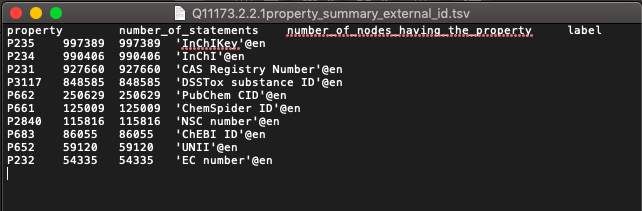

In [49]:
types = [
    ("time","time","property_summary_time"),
    ("wikibase_item","wikibase_item","property_summary_wikibase_item"),
    ("math","math","property_summary_math"),
    ("wikibase_form","wikibase-form","property_summary_wikibase_form"),
    ("quantity","quantity","property_summary_quantity"),
    ("string","string","property_summary_string"),
    ("external_id","external-id","property_summary_external_id"),
    ("commonsMedia","commonsMedia","property_summary_commonsMedia"),
    ("globe_coordinate","globe-coordinate","property_summary_globe_coordinate"),
    ("monolingualtext","monolingualtext","property_summary_monolingualtext"),
    ("musical_notation","musical-notation","property_summary_musical_notation"),
    ("geo_shape","geo-shape","property_summary_geo_shape"),
    ("url","url","property_summary_url"),
]

cmd = "$kgtk query  -i $WIKIDATA_PARTS/$TYPE_FILE -i $WIKIDATA_PARTS/$label --graph-cache $STORE \
-o $OUTPUT_FOLDER/$output_file \
--match 'part: (n1)-[l{label: llab}]->(n2), label: (llab)-[:label]->(label)' \
--return 'distinct llab as property, count(llab) as number_of_statements, count(n2) as number_of_nodes_having_the_property, label as `label`' \
--where 'label.kgtk_lqstring_lang_suffix = \"en\"' \
--order-by 'count(llab) desc, count(n2) desc' \
--limit $K"

for type,name, output_file in types:
    run_command(cmd, {"TYPE_FILE": type,"output_file":output_file})

$kgtk query  -i $WIKIDATA_PARTS/$time -i $WIKIDATA_PARTS/$label --graph-cache $STORE --match 'part: (n1)-[l{label: llab}]->(n2), label: (llab)-[:label]->(label)' --return 'distinct llab as property, count(llab) as number_of_statements, count(n2) as number_of_nodes_having_the_property, label as `label`' --where 'label.kgtk_lqstring_lang_suffix = "en"' --order-by 'count(llab) desc, count(n2) desc' --limit $K
property	number_of_statements	number_of_nodes_having_the_property	label
P575	20	20	'time of discovery or invention'@en
P2669	1	1	'discontinued date'@en
P571	1	1	'inception'@en
P729	1	1	'service entry'@en
P730	1	1	'service retirement'@en

[2020-10-13 13:00:55 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_2_c2."node1" "property", count(graph_2_c2."node1") "number_of_statements", count(graph_5_c1."node2") "number_of_nodes_having_the_property", graph_2_c2."node2" "label"
     FROM graph_2 AS graph_2_c2, graph_5 AS graph_5_c1
     WHERE gra

property	number_of_statements	number_of_nodes_having_the_property	label
P235	997389	997389	'InChIKey'@en
P234	990406	990406	'InChI'@en
P231	927660	927660	'CAS Registry Number'@en
P3117	848585	848585	'DSSTox substance ID'@en
P662	250629	250629	'PubChem CID'@en
P661	125009	125009	'ChemSpider ID'@en
P2840	115816	115816	'NSC number'@en
P683	86055	86055	'ChEBI ID'@en
P652	59120	59120	'UNII'@en
P232	54335	54335	'EC number'@en

[2020-10-13 13:01:05 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_10_c1."label" "property", count(graph_10_c1."label") "number_of_statements", count(graph_10_c1."node2") "number_of_nodes_having_the_property", graph_2_c2."node2" "label"
     FROM graph_10 AS graph_10_c1, graph_2 AS graph_2_c2
     WHERE graph_10_c1."label"=graph_10_c1."label"
     AND graph_2_c2."label"=?
     AND graph_10_c1."label"=graph_2_c2."node1"
     AND (kgtk_lqstring_lang_suffix(graph_2_c2."node2") = ?)
     GROUP BY property
     ORDER BY count

property	number_of_statements	number_of_nodes_having_the_property	label
P2888	41	41	'exact match'@en
P856	26	26	'official website'@en
P6363	4	4	'WordLift URL'@en
P1482	1	1	'Stack Exchange tag'@en
P1709	1	1	'equivalent class'@en
P2078	1	1	'user manual URL'@en
P2699	1	1	'URL'@en
P854	1	1	'reference URL'@en

[2020-10-13 13:01:35 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_16_c1."label" "property", count(graph_16_c1."label") "number_of_statements", count(graph_16_c1."node2") "number_of_nodes_having_the_property", graph_2_c2."node2" "label"
     FROM graph_16 AS graph_16_c1, graph_2 AS graph_2_c2
     WHERE graph_16_c1."label"=graph_16_c1."label"
     AND graph_2_c2."label"=?
     AND graph_16_c1."label"=graph_2_c2."node1"
     AND (kgtk_lqstring_lang_suffix(graph_2_c2."node2") = ?)
     GROUP BY property
     ORDER BY count(graph_16_c1."label") DESC, count(graph_16_c1."node2") DESC
     LIMIT ?
  PARAS: ['label', 'en', 10]
----------------

# 2.2 Divided by data type of property


## For each data type select top K properties based on number of statements
### pnode, label, number of statements, number of nodes having the property, proportion of all nodes having the property

## Header
### property -- top k distinct properties
### number_of_statements -- number of statements corresponding to the property
### number_of_nodes_having_the_property -- number of nodes having the property
### label -- label of the property

## 2.3 Item properties
### Top K qnodes used in node2
### qnode, label, count

## Header

### qnode -- qnode corresponding to node2 
### count -- number of times qnode is present 
### label -- label of the qnode

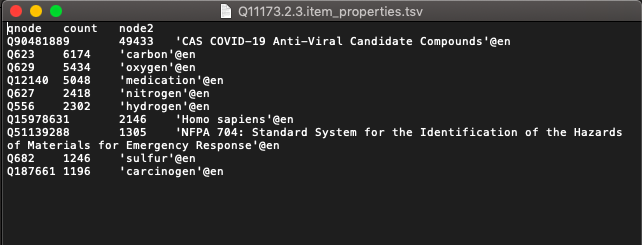


In [50]:
cmd  = "$kgtk query  -i $WIKIDATA_PARTS/$wikibase_item -i $WIKIDATA_PARTS/$label --graph-cache $STORE \
-o $OUTPUT_FOLDER/$item_properties \
--match 'part: (n1)-[l]->(n2), label: (n2)-[:label]->(label)' \
--return 'distinct n2 as qnode, count(n2) as count, label ' \
--where '(label.kgtk_lqstring_lang_suffix = \"en\") AND (n2 != \"__subset_name\")' \
--order-by 'count(n2) desc' \
--limit $K"
run_command(cmd, {"__subset_name":subset_name})

$kgtk query  -i $WIKIDATA_PARTS/$wikibase_item -i $WIKIDATA_PARTS/$label --graph-cache $STORE --match 'part: (n1)-[l]->(n2), label: (n2)-[:label]->(label)' --return 'distinct n2 as qnode, count(n2) as count, label ' --where '(label.kgtk_lqstring_lang_suffix = "en") AND (n2 != "Q11173")' --order-by 'count(n2) desc' --limit $K
qnode	count	node2
Q90481889	49433	'CAS COVID-19 Anti-Viral Candidate Compounds'@en
Q623	6174	'carbon'@en
Q629	5434	'oxygen'@en
Q12140	5048	'medication'@en
Q627	2418	'nitrogen'@en
Q556	2302	'hydrogen'@en
Q15978631	2146	'Homo sapiens'@en
Q51139288	1305	'NFPA 704: Standard System for the Identification of the Hazards of Materials for Emergency Response'@en
Q682	1246	'sulfur'@en
Q187661	1196	'carcinogen'@en

[2020-10-13 13:01:36 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_1_c1."node2" "qnode", count(graph_1_c1."node2") "count", graph_2_c2."node2"
     FROM graph_1 AS graph_1_c1, graph_2 AS graph_2_c2
     WHERE graph_2

## 2.4 Time properties
### min time, max time
### Chart: x axis is different times, y axis is count of nodes that have the value. Binning maybe required
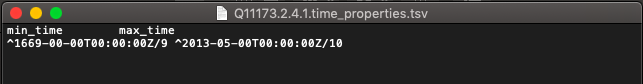


In [51]:
!$kgtk query  -i $WIKIDATA_PARTS/$time  --graph-cache $STORE \
-o $OUTPUT_FOLDER/$time_properties \
--match 'part: (n1)-[l]->(time)' \
--return 'min(time) as min_time, max(time) as max_time'

[2020-10-13 13:01:52 query]: SQL Translation:
---------------------------------------------
  SELECT min(graph_5_c1."node2") "min_time", max(graph_5_c1."node2") "max_time"
     FROM graph_5 AS graph_5_c1
  PARAS: []
---------------------------------------------
min_time	max_time
^1669-00-00T00:00:00Z/9	^2013-05-00T00:00:00Z/10
        0.55 real         0.43 user         0.11 sys


## Count of top K distinct time 

## Header

### time -- time
### count --- number of times it is present

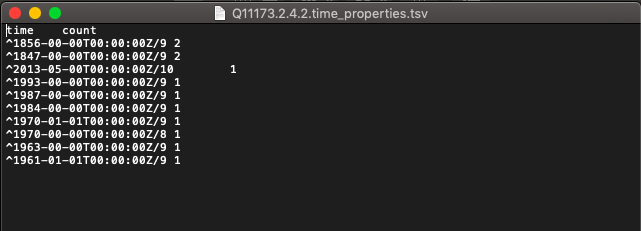

In [52]:
!$kgtk query  -i $WIKIDATA_PARTS/$time  --graph-cache $STORE \
-o $OUTPUT_FOLDER/$time_properties_count \
--match 'part: (n1)-[l]->(time)' \
--return 'distinct time as `time`, count(time) as count' \
--order-by 'count(time) desc' \
--limit $K

[2020-10-13 13:02:01 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_5_c1."node2" "time", count(graph_5_c1."node2") "count"
     FROM graph_5 AS graph_5_c1
     GROUP BY time
     ORDER BY count(graph_5_c1."node2") DESC
     LIMIT ?
  PARAS: [10]
---------------------------------------------
time	count
^1856-00-00T00:00:00Z/9	2
^1847-00-00T00:00:00Z/9	2
^2013-05-00T00:00:00Z/10	1
^1993-00-00T00:00:00Z/9	1
^1987-00-00T00:00:00Z/9	1
^1984-00-00T00:00:00Z/9	1
^1970-01-01T00:00:00Z/9	1
^1970-00-00T00:00:00Z/8	1
^1963-00-00T00:00:00Z/9	1
^1961-01-01T00:00:00Z/9	1
        0.56 real         0.44 user         0.11 sys


## 2.5 Quantity properties
### list of units and counts
### Chart: x axis is different magnitudes, y axis is count of nodes that have the value. Binning is required

## Header
### units -- units
### counts -- count corresponding to each unit
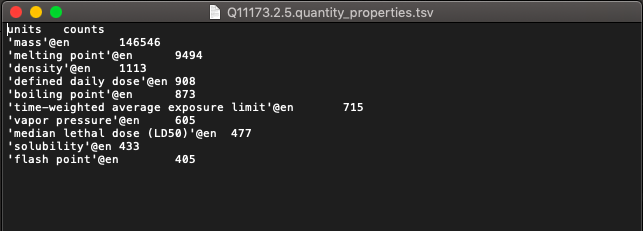

In [53]:
!$kgtk query  -i $WIKIDATA_PARTS/$quantity -i $WIKIDATA_PARTS/$label --graph-cache $STORE \
-o $OUTPUT_FOLDER/$quantity_properties \
--match 'part: (n1)-[l{label: llab}]->(n2), label: (llab)-[:label]->(label)' \
--return 'distinct label as units, count(llab) as counts'\
--where 'label.kgtk_lqstring_lang_suffix = "en"' \
--order-by 'count(llab) desc'\
--limit $K

[2020-10-13 13:02:09 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_2_c2."node2" "units", count(graph_8_c1."label") "counts"
     FROM graph_2 AS graph_2_c2, graph_8 AS graph_8_c1
     WHERE graph_2_c2."label"=?
     AND graph_8_c1."label"=graph_8_c1."label"
     AND graph_2_c2."node1"=graph_8_c1."label"
     AND (kgtk_lqstring_lang_suffix(graph_2_c2."node2") = ?)
     GROUP BY units
     ORDER BY count(graph_8_c1."label") DESC
     LIMIT ?
  PARAS: ['label', 'en', 10]
---------------------------------------------
units	counts
'mass'@en	146546
'melting point'@en	9494
'density'@en	1113
'defined daily dose'@en	908
'boiling point'@en	873
'time-weighted average exposure limit'@en	715
'vapor pressure'@en	605
'median lethal dose (LD50)'@en	477
'solubility'@en	433
'flash point'@en	405
        1.63 real         1.37 user         0.13 sys


## 2.6 String, Monolingual, url, External id, Math musical notation
### number of distinct values
### list of top M values

## Header
### value -- value
### number_of_statements -- number of statements corresponding to that value.

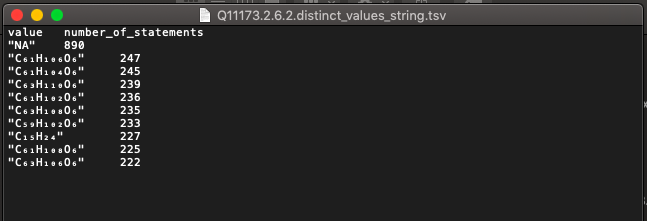


In [54]:
types = [
    ("math","distinct_values_math"),
    ("string","distinct_values_string"),
    ("external_id","distinct_values_external_id"),
    ("monolingualtext","distinct_values_monolingual_text"),
    ("musical_notation","distinct_values_musical_notation"),
]

cmd = "$kgtk query  -i $WIKIDATA_PARTS/$TYPE_FILE  --graph-cache $STORE \
-o $OUTPUT_FOLDER/$output_file \
--match 'part: (n1)-[l]->(n2)' \
--return 'distinct n2 as value, count(n2) as number_of_statements' \
--order-by 'count(n2) desc' \
--limit $K"

for type, output_file in types:
    run_command(cmd, {"TYPE_FILE": type,"output_file":output_file})

$kgtk query  -i $WIKIDATA_PARTS/$math  --graph-cache $STORE --match 'part: (n1)-[l]->(n2)' --return 'distinct n2 as value, count(n2) as number_of_statements' --order-by 'count(n2) desc' --limit $K
value	number_of_statements

[2020-10-13 13:02:23 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_6_c1."node2" "value", count(graph_6_c1."node2") "number_of_statements"
     FROM graph_6 AS graph_6_c1
     GROUP BY value
     ORDER BY count(graph_6_c1."node2") DESC
     LIMIT ?
  PARAS: [10]
---------------------------------------------
        0.61 real         0.47 user         0.12 sys

$kgtk query  -i $WIKIDATA_PARTS/$string  --graph-cache $STORE --match 'part: (n1)-[l]->(n2)' --return 'distinct n2 as value, count(n2) as number_of_statements' --order-by 'count(n2) desc' --limit $K
value	number_of_statements
"NA"	890
"C₆₁H₁₀₆O₆"	247
"C₆₁H₁₀₄O₆"	245
"C₆₃H₁₁₀O₆"	239
"C₆₁H₁₀₂O₆"	236
"C₆₃H₁₀₈O₆"	235
"C₅₉H₁₀₂O₆"	233
"C₁₅H₂₄"	227
"C₆₁H₁₀₈O₆"	225
"C₆₃

## 2.7 Globe coordinate
### map with top M, put circles with radius proportional to the number of nodes that have the coordinate 

## Header
### Coordinate -- Coordinate
### Count -- Number of instances of the coordinate
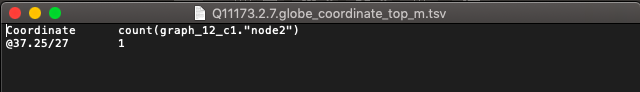

In [55]:
!$kgtk query  -i $WIKIDATA_PARTS/$globe_coordinate -i $WIKIDATA_PARTS/$label --graph-cache $STORE \
-o $OUTPUT_FOLDER/$globe_coordinate_top_m \
--match 'part: (n1)-[l]->(n2)' \
--return 'distinct n2 as Coordinate, count(n2)'\
--order-by 'count(n2) desc' \
--limit $K

[2020-10-13 13:02:57 query]: SQL Translation:
---------------------------------------------
  SELECT DISTINCT graph_12_c1."node2" "Coordinate", count(graph_12_c1."node2")
     FROM graph_12 AS graph_12_c1
     GROUP BY Coordinate
     ORDER BY count(graph_12_c1."node2") DESC
     LIMIT ?
  PARAS: [10]
---------------------------------------------
Coordinate	count(graph_12_c1."node2")
@37.25/27	1
        0.55 real         0.43 user         0.10 sys


## 2.8 geo-shape
### random sample of M nodes that have the property

## Header
### node1 -- node1
### label -- label
### node2 -- node2


In [45]:
try:
    df = pd.read_csv(os.path.join(os.getenv('WIKIDATA_PARTS'),os.getenv('geo_shape')),delimiter='\t',index_col=False)
    try:
        num_rows = min(int(K[1:-1]),len(df))
    except Exception as e:
        num_rows = min(int(K),len(df))
    df.sample(n=num_rows)
    df.to_csv(os.path.join(os.getenv('OUTPUT_FOLDER'),os.getenv('geo_shape_top_m')),sep='\t',index=False)
except Exception as e:
    print(e)

In [46]:
print(df)

Empty DataFrame
Columns: [id, node1, label, node2]
Index: []
